# Universidade Federal do ABC - UFABC
## Centro de Matemática, Computação e Cognição - CMCC

## Disciplina: Visão Computacional e Processamento de Imagens

Responsável: Prof. Dr. Francisco Zampirolli

Estudante: [Bruno Aristimunha](https://github.com/bruAristimunha).

Santo André, Terceiro Quadrimestre de 2019

### Projeto Final da Disciplina

# Classificação de Grão de Pólen.

## Introdução <a id='introducao'></a>

Os grãos de pólen são importantes marcadores geológicos e geográficos presentes em todo o globo. Suas aplicações são diversas, mas dentre as mais comuns podemos citar o uso para a perícia investigativa, o mapeamento do clima em função de milhares de anos e estudos alérgicos, além da certificação da produção de alimentos à base de mel. Em todas as áreas citadas, para que se obtenha resultados significativos de análises robustas, faz-se necessário o levantamento estatístico da distribuição das categorias de pólen presentes em uma amostra.

Esse processo do estudo da distribuição dos grãos de pólen possui referência em G. Erdtman (1944), que descreve uma metodologia de obtenção, detalhamento da química e aplicações possíveis. Nesse momento, o estudo dos grãos de pólen se baseado nos indícios da relação de gramas por grãos de pólen. Em função dos tempo e em consequência da convergência evolutiva, temos que os principais atributos adotados para reconhecimento do grão de pólen são: tamanho, formato (polaridade e simetria), abertura e ornamentação.

Uma propriedade importante dos grãos de pólen está relacionado com sua imutabilidade em condições climáticas ou mudanças de ambientes. Dado sua baixa deterioração no ambiente, temos que objetos podem ser usados como marcadores temporais, e locais. Além disso, considerando a diversidade, as semelhanças interespécies e características microscópicas, o reconhecimento de cada espécie demanda uma ampla e longa formação botânica. O processo de aquisição está exposto a seguir na Figura 1 e um vídeo com o processo de [aquisição](https://youtu.be/R5t-oA796to?t=11).

![aquisicao](https://raw.githubusercontent.com/bruAristimunha/pollenData/master/Figs/capture-pipeline.png)
#### Figura 01: Processo de aquisição dos grãos de pólen. Inicialmente a amostra é capturada em uma lâmina, há ampliação da imagem no microscópio posteriormente, busca-se focalizar o grão e estudar sua morfologia, classificando a espécie.


O processo não trivial de aquisição da imagem demanda tempo, custos em materiais, além de técnica e anos de experiência para classificação. Ademais, dependendo do material usado para aquisição pode haver visualizações distintas para a mesma espécie de pólen. A Figura 2 mostra a diferença entre metodologias de captura de imagens.

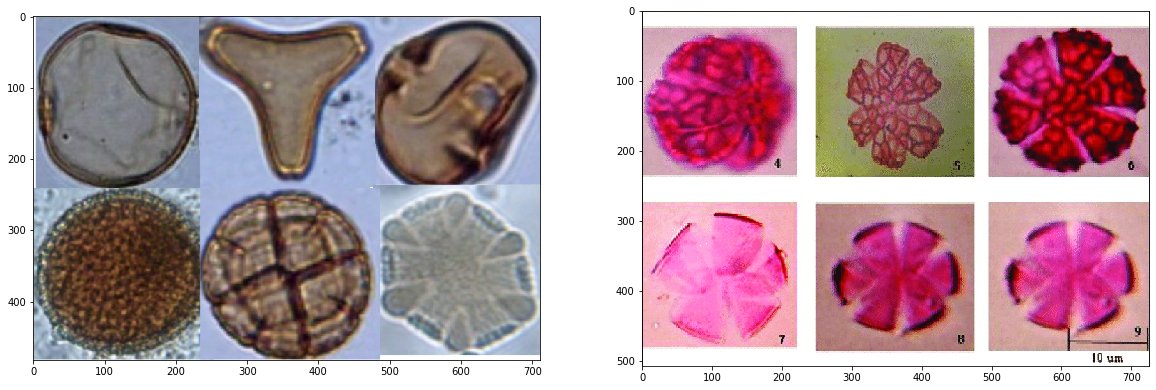

In [115]:
from skimage import io
import matplotlib.pyplot as plt
url1 = "https://raw.githubusercontent.com/bruAristimunha/pollenData/master/Figs/solvent2.png"
url2 = "https://raw.githubusercontent.com/bruAristimunha/pollenData/master/Figs/solvent1.png"

fig = plt.figure(figsize=(20,20))

image1 = io.imread(url1)
image2 = io.imread(url2)

plt.subplot(221).imshow(image1)
plt.subplot(222).imshow(image2)
plt.show()


#### Figura 02: A diferença entre solventes gera uma coloração totalmente distinta quando visualizada no microscópio, empecilhos como esses dificultam a generalização da classificação do biólogo.


As abordagens computacionais para reconhecimento dos padrões presentes nos grãos de pólen, podemos ser divididas em duas: extração pré-definida de atributos e reconhecimento de atributos de forma automática. Da primeira abordagem empregamos atributos baseados em cores, texturas, formatos e usualmente, através de um classificador conseguimos determinar a classe. Na segunda abordagem os algoritmos aprende o padrão presente na imagem, e consegue distinguir a classe apresentada e associada ao grão de pólen, comum com redes neurais convolucionais.


O estado da arte no reconhecimento de grãos de pólen emprega redes neurais convolucionais, [André R., et al. (2020)](), [Sevillano, V., and Aznarte, J. L. (2019)](). Essas técnicas de aprendizado profundo possibilitam a extração de atributos, no entanto, as arquiteturas usadas possuem premissas distintas para obtenção dos atributos e aplicação de filtros. Nesse sentido, dado o processo de rotulação, focalização e obtenção das imagens são manuais, esse trabalho visa avaliar o desempenho dos métodos na simulação de uma diferente focalização na imagem (borramento). Para tanto, empregamos as arquiteturas em estado da arte ou próximas para a tarefa de classificação dos grãos de pólen.


O restante desse texto é organizado como segue. Na Seção [2](#Metodologia) nós descrevemos a metodologia proposta que foi empregada e os materiais e métodos. Então, na Seção [4](#Resultados) nós discutimos os discutimos encontrados com a literatura. Considerações e trabalhos futuros estão contidos na Seção [5](#Conclusao).



## Metodologia <a id='Metodologia'></a>




Inicialmente, foram empregadas oito arquiteturas distintas: DenseNet121, DenseNet169, InceptionResNetV2, InceptionV3, ResNet50, VGG16, VGG19 e Xception. Nesses modelos, a otimização do gradiente descendente estocástico com taxa de aprendizado de $10^{-3}$ e impulso de $0.9$, foram utilizados, além de serem empregadas $30$ épocas de treinamento.

## Dados/imagens

Foram utilizado um banco de imagens de polens nativos do Mato Grosso do Sul. Por se tratar de um objeto de geometria tridimensional, as diferentes angulações influenciam tanto na classificação do especialista quanto em algoritmos tradicionais de classificação, portanto cada grão possui 35 imagens distintas.

In [2]:
#Divisão do Conjunto de Imagem
import split_folders

#Bibliotecas empregadas na análise
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping



## Processamento de imagens


O conjunto de dados possui [$23$](http://palinovic.weebly.com/bancos-de-imagens.html) imagens de espécies, cada espécie com um total de $35$ registros, totalizando $805$ imagens. Para validação do método, em nível de espécie, realizamos a divisão: treino, validação e teste, com as porcentagens: $60$, $20$ e $20$, respectivamente.


In [5]:
per_train = 0.6
per_test = 0.2 
per_validation = 0.2
seed_split_folder = 42

split_folders.ratio(input='../Data/Raw/pollen23e/', 
                    output=".../Data/Processed/pollen23e_split", 
                    seed=seed_split_folder, 
                    ratio=(per_train, per_test, per_validation)) # default values


Copying files: 801 files [00:02, 377.05 files/s]


No conjunto de treino e validação, optou-se pelo aumento de dados empregando rotações de $45^{\circ}$, traçando um paralelo com a literatura botânica, que emprega rotações de $45^{\circ}$ na captura de imagens. Além disso, geramos imagens mudando a faixa de altura e largura em uma fração de $10\%$; usando cisalhamento em $0.1^{\circ}$ no sentido anti-horário; ampliamos e reduzimos em aleatoriamente entre $\{0.9, 1.25\}$; giramos a imagem na horizontal, e na vertical; variamos a intensidade brilho aleatoriamente entre $\{0.5, 1.5\}$; e preenchemos eventuais valores faltantes nas figuras com método de reflexão. Por se tratar de um objeto de geometria tridimensional levantou-se a hipótese de que essas transformações auxiliam na generalização dos métodos. Das $480$ imagens de treino obtivemos um total de $6235$ derivadas, no conjunto de validação, das $160$ alcançamos um total de $2240$.



## Exemplo de uma imagem gerada

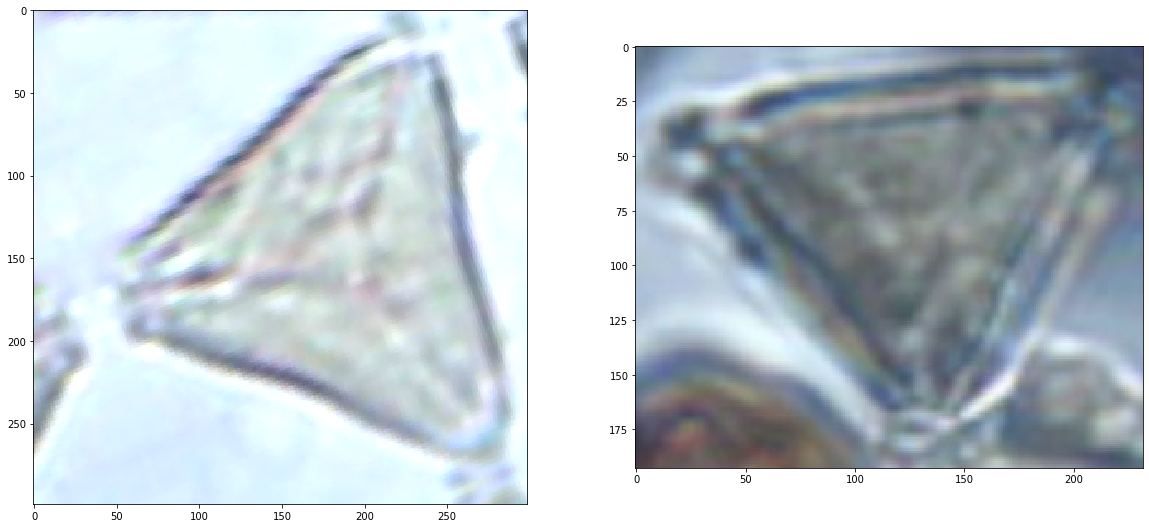

In [191]:
from skimage import io
import matplotlib.pyplot as plt
url1 = "../Data/pollen23e_aug/train/aug_263_4505756.png"
url2 = "../Data/pollen23e_split/train/matayba_guianensis/matayba_15.jpg"

fig = plt.figure(figsize=(20,20))

image1 = io.imread(url1)
image2 = io.imread(url2)

plt.subplot(221).imshow(image1)
plt.subplot(222).imshow(image2)
plt.show()


In [6]:
lr=1E-3
momentum= 0.9
batch_size = 64
epochs = 30

In [7]:
train_datagen = ImageDataGenerator(
           rotation_range=45,
           width_shift_range=0.1,
           height_shift_range=0.1,
           shear_range=0.01,
           zoom_range=[0.9,1.25],
           horizontal_flip=True,
           vertical_flip=True,
           fill_mode='reflect',
           data_format='channels_last',
           brightness_range=[0.5, 1.5])

test_datagen = ImageDataGenerator()


### Transferência de Aprendizado



Os experimentos foram executados com a técnica de Ajuste Fino - AF, em que os pesos dos modelos foram inicializados com a rede já previamente treinados no banco de imagens ImageNet. Para todas arquiteturas usamos o método de otimização gradiente descendente estocástico com a taxa de aprendizado de $10^{-3}$ com momento de $0.9$, e ao final de todo modelo conectamos uma camada achatada e uma camada totalmente conectada para predição com ativação Softmax. 

Em todos os modelos, dado limitação de tempo, exploramos $30$ épocas de treinamento, com tamanho de batch de $16$. 

In [10]:
batch_size = 16

In [9]:
#!ls ../data/
!rm ../Data/pollen23e_aug_multi/train/*
!mkdir ../Data/pollen23e_aug/valid
!mkdir ../Data/pollen23e_aug/train


/bin/sh: 1: rm: Argument list too long
mkdir: cannot create directory ‘../data/pollen23e_aug/valid’: File exists
mkdir: cannot create directory ‘../data/pollen23e_aug/train’: File exists


In [8]:

from tensorflow.keras.applications import DenseNet121, DenseNet169, InceptionResNetV2, InceptionV3, MobileNet, MobileNetV2, NASNetMobile, ResNet50, VGG16, VGG19, Xception

from tensorflow.keras.layers import Dense


models = [DenseNet121, DenseNet169, InceptionResNetV2, InceptionV3, 
           ResNet50, VGG16, VGG19, Xception]

models_name = ['DenseNet121', 'DenseNet169', 'InceptionResNetV2', 'InceptionV3', 'ResNet50', 
               'VGG16', 'VGG19', 'Xception']


img_width, img_height = 299, 299


In [ ]:
for enum, model in enumerate(models):


    train_generator = train_datagen.flow_from_directory(
                            '../Data/Processed/pollen23e_split/train',
                            target_size = (299,299),
                            batch_size = batch_size,
                            save_to_dir = '../Data/pollen23e_aug/train',
                            save_prefix='aug', 
                            save_format='png',
                            class_mode = "categorical",
                            follow_links = True,
                            seed = seed)

    validation_generator = train_datagen.flow_from_directory(
                            '../Data/Processed/pollen23e_split/val',
                            target_size = (299,299),
                            batch_size = batch_size,
                            class_mode = "categorical",
                            save_to_dir = '../Data/pollen23e_aug/valid',
                            save_prefix='aug', 
                            save_format='png',
                            follow_links = True,
                            seed = seed)

    
    # Save the model according to the conditions
    checkpoint = ModelCheckpoint("../Checkpoints/checkpoints_class/"+models_name[enum], 
                                 monitor='val_loss', verbose=1, 
                                 save_weights_only=False, 
                                 mode='auto',  
                                 save_best_only=True)
    
    model = models[enum](weights     = "imagenet", 
                         include_top = False, 
                         input_shape = (img_width, img_height, 3))
    
    #Adicionando um camada adicional
    x = model.output
    x = Flatten()(x)
    predictions = Dense(23, activation="softmax",use_bias=False)(x)
    
    # Camada final
    model = Model(model.input,predictions)
    # compile the model
    model.compile(loss = "categorical_crossentropy", 
                  optimizer =  optimizers.SGD(lr=lr, momentum=momentum),
                  metrics=["accuracy"])

    
    history_acc = model.fit_generator(
                train_generator,
                steps_per_epoch = train_generator.samples/batch_size,
                epochs = epochs,
                callbacks = [checkpoint],
                validation_data = validation_generator,
                validation_steps = validation_generator.samples/batch_size)
    
    model.save("../Models/models_class/"+models_name[enum]+".h5")    
    


## Borramento

No conjunto de teste aplicamos um filtro gaussiano de kernel $8$ por $8$ para realizar um borramento uniforme no conjunto de imagens

In [27]:
cp ../Data/Processed/pollen23e_split/test ../Data/Processed/pollen23e_split/test_blurred

test/  test_blurred/  train/  val/


In [ ]:
mypath = '../Data/Processed/pollen23e_split/test_blurred'
from os import listdir, rename
import shutil

from os.path import isdir, join
folder =  listdir(mypath)

for fol in folder:
    
    arquivos = (listdir(mypath+"/"+fol))
    
    for arq in arquivos:
        caminho = mypath+'/'+fol+'/'+arq
        !convert {caminho} -filter Gaussian -blur 0x8 {caminho}
       

## Exemplo de uma imagem borrada gerada

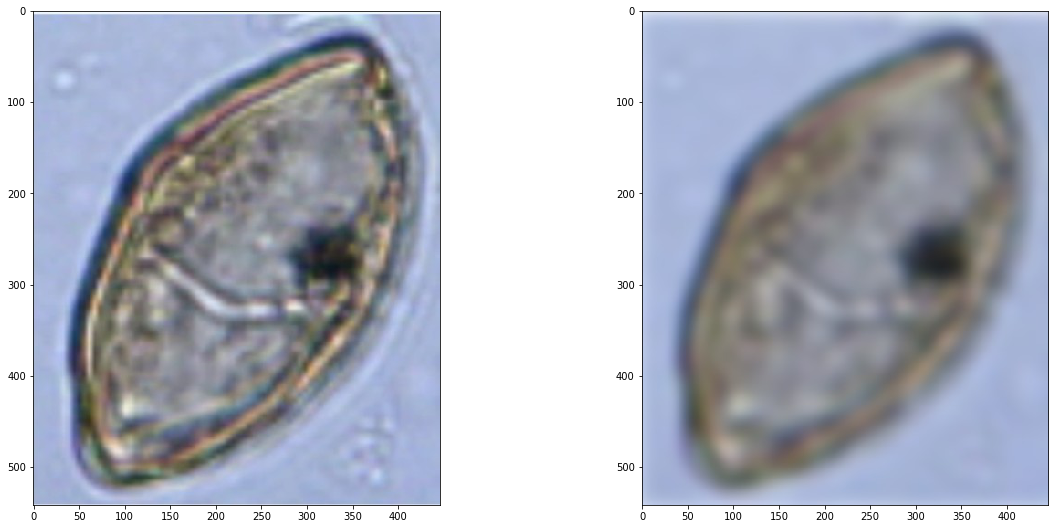

In [193]:
from skimage import io
import matplotlib.pyplot as plt
url1 = "../Data/pollen23e_split/test/arecaceae/arecaceae_02.jpg"
url2 = "../Data/pollen23e_split/test_blurred/arecaceae/arecaceae_02.jpg"

fig = plt.figure(figsize=(20,20))

image1 = io.imread(url1)
image2 = io.imread(url2)

plt.subplot(221).imshow(image1)
plt.subplot(222).imshow(image2)
plt.show()


# Resultados <a id='Resu'></a>


De maneira geral, temos que os métodos apresentaram bons valores durante o treino, mas um péssimo valor durante o teste. Observamos a seguir o comportomento da perda no processo de treino e validação dos métodos.


In [34]:

model_path = ["../Models/models_class/DenseNet121.h5",
              "../Models/models_class/DenseNet169.h5",
              "../Models/models_class/InceptionResNetV2.h5",
              "../Models/models_class/InceptionV3.h5",
              "../Models/models_class/ResNet50.h5",
              "../Models/models_class/VGG16.h5",
              "../Models/models_class/VGG19.h5",
              "../Models/models_class/Xception.h5"]



In [35]:
from tensorflow.keras.models import load_model

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 16
seed = 42

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
                        '../Data/Processed/pollen23e_split/test',
                        target_size = (299,299),
                        batch_size = batch_size,
                        class_mode = 'categorical',
                        follow_links = True,
                        seed = seed)

test_generator_blurred = test_datagen.flow_from_directory(
                        '../Data/Processed/pollen23e_split/test_blurred',
                        target_size = (299,299),
                        batch_size = batch_size,
                        class_mode = 'categorical',
                        follow_links = True,
                        seed = seed)

test_generator.reset()

test_generator_blurred.reset()


Found 161 images belonging to 23 classes.
Found 161 images belonging to 23 classes.


In [47]:
modelo_carregado  = list(map(load_model,model_path))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [124]:
df = []
y_true = test_generator.classes

for indice, mode in enumerate(modelo_carregador):
    test_generator.reset()
    pred = mode.predict_generator(test_generator)
    val_preds = np.argmax(pred, axis=-1)
    acc = accuracy_score(y_true=y_true, y_pred=val_preds)
    print(indice, acc)

0 0.037267080745341616
1 0.062111801242236024
2 0.043478260869565216
3 0.037267080745341616
4 0.062111801242236024
5 0.043478260869565216
6 0.043478260869565216
7 0.043478260869565216


In [129]:
semburry = [[0, 0.037267080745341616],
[1, 0.062111801242236024],
[2, 0.043478260869565216],
[3, 0.037267080745341616],
[4, 0.062111801242236024],
[5, 0.043478260869565216],
[6, 0.043478260869565216],
[7, 0.043478260869565216]]


In [130]:
sb = pd.DataFrame(semburry)

In [125]:
test_generator = test_datagen.flow_from_directory(
                        '../data/pollen23e_split/test_burry',
                        target_size = (299,299),
                        batch_size = batch_size,
                        class_mode = 'categorical',
                        follow_links = True,
                        seed = seed)


Found 161 images belonging to 23 classes.


In [134]:
df_b = []
y_true = test_generator.classes

for indice, mode in enumerate(modelo_carregador):
    test_generator.reset()
    pred = mode.predict_generator(test_generator)
    val_preds = np.argmax(pred, axis=-1)
    acc = accuracy_score(y_true=y_true, y_pred=val_preds)
    df_b.append([acc])

In [190]:
resu = pd.concat([sb.drop([0],1),pd.DataFrame(df_b)],1)
resu.columns = ['Sem borrar','borrando']
resu['modelos'] =  ["DenseNet121","DenseNet169","InceptionResNetV2","InceptionV3","ResNet50","VGG16","VGG19","Xception"]  

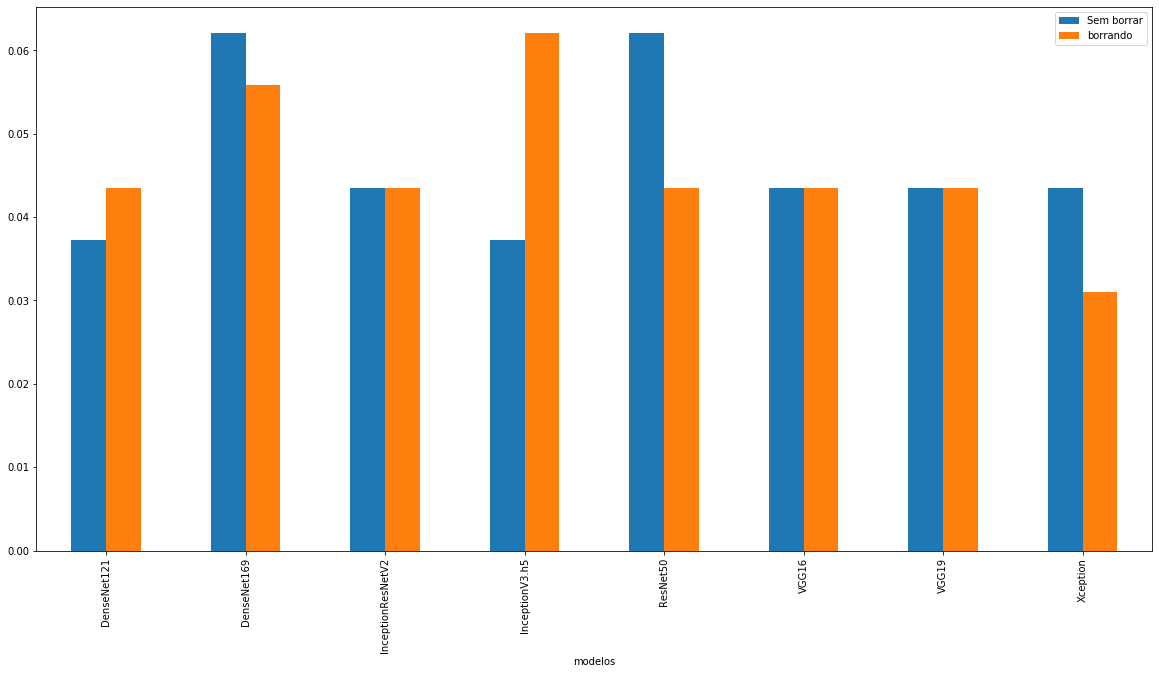

In [163]:
#resu = resu.set_index('modelos')
ax = resu.plot.bar(figsize=(20,10))
plt.show()

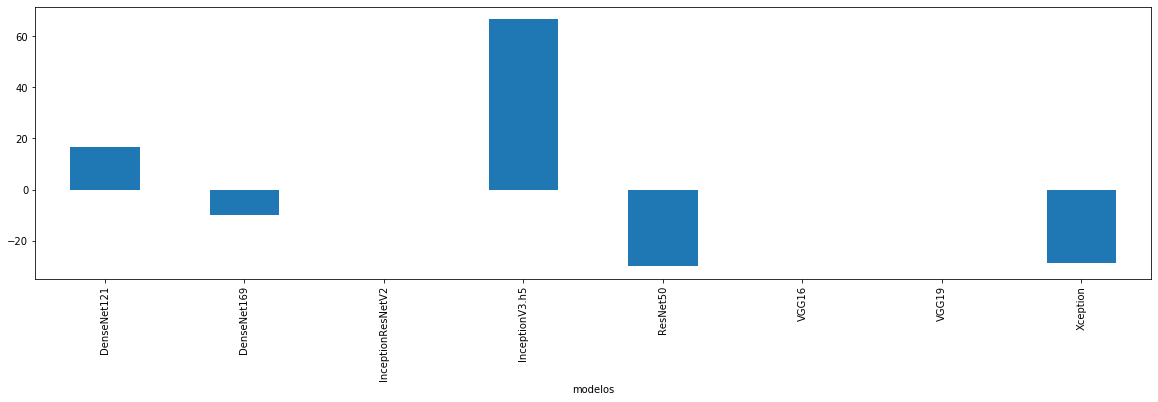

In [188]:
ax = ((resu['borrando'].div(resu['Sem borrar']) -1) *100).plot.bar(figsize=(20,5))

O pior modelo que piorou o aprendizado após o processo de borragem foi a Resnet. 

![resnet](https://neurohive.io/wp-content/uploads/2019/01/resnet-e1548261477164.png)

Essa arquitetura foi a primeira a ultrapassar o erro humano na classificação do conjunto de imagem do ImageNet . Possui conexões saltadas especiais e um intensivo uso de normalização do lote ($\textit{BatchNormalization}$). 
            
Essa arquitetura, assim como a InceptionNet não possui camadas totalmente conectadas no final da rede. A motivação de surgimento das ResNet vem de uma problemática no empilhamento de uma rede profunda. Redes como VGG e Inception não melhoram na medida do empilhamento e, espera-se que na medida da profundidade, as redes convulsionais adquirissem mais performance. De forma prática, uma rede profunda como VGG com 28 camadas apresenta um resultado melhor do que uma com $56$ camadas. A generalização do modelo não aumenta com o incremento de profundidade. Situações como essas podem aparentar $\textit{overfitting}$, no entanto, não apresentam comportamento divergentes no teste e treino. A hipótese geradora do método ResNet caracteriza isso como um problema de otimização. 
            
 Modelos muito profundos são difíceis de otimizar considerando suas múltiplas camadas e conexões locais. A solução encontrada consiste em copiar a camada aprendida no início e configurar as camadas adicionais de identificação. Além disso, nessa arquitetura, uma camada de convolução no começo e ao final da camada totalmente conectada foi adicionada. Por preservar o tamanho das camadas ocultas, torna-se possível generalizar a profundidade facilmente para $34$, $50$, $10$ ou $152$ camadas. Outro ponto importante dessa rede em comparação com as demais é a remoção de camadas de $\textit{dropout}$.

## Conclusão

Esse trabalho analisou o comportamento de diferentes classificadores no teste de imagens focalizadas e imagens borradas. Observamos uma queda nos resultados no modelo que visam aprender o resíduo associado ao processo de otimização (ResNet). Mais épocas de treinamentos se fazem necessário para reproduzir os resultados em estado da arte. Outra abordagem também viável, é analisar o comportamento do método para aprendizado da taxonomia das imagens, isto é, analisar o comportamento em processo de múltiplos rótulos para determinar se há um ganho em associar a taxonomia.

## Referências

- Gonçalves, Ariadne Barbosa, et al. ["Feature extraction and machine learning for the classification of Brazilian Savannah pollen grains."](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0157044) PloS one 11.6 (2016): e0157044.

- Navares, Ricardo, and José Luis Aznarte. ["Geographical Imputation of Missing Poaceae Pollen Data via Convolutional Neural Networks."](https://www.mdpi.com/2073-4433/10/11/717) Atmosphere 10.11 (2019): 717.

- Menad, Hanane, Farah Ben-Naoum, and Abdelmalek Amine. ["A Thresholding Approach for Pollen Detection in Images Based on Simulated Annealing Algorithm."](https://www.igi-global.com/article/a-thresholding-approach-for-pollen-detection-in-images-based-on-simulated-annealing-algorithm/237182) International Journal of Agricultural and Environmental Information Systems (IJAEIS) 10.4 (2019): 18-36.

- Gallardo-Caballero, Ramón, et al. ["Precise Pollen Grain Detection in Bright Field Microscopy Using Deep Learning Techniques."](https://www.mdpi.com/1424-8220/19/16/3583) Sensors 19.16 (2019): 3583.

- Vizgarra, Cristian G., Informaticas Avanzadas, and Jorge Gotay Sardiñas. ["Advances in the Classification of Pollen Grains Images Obtained from Honey Samples of Tetragonisca angustula in the Province of Chaco, Argentina."](https://ijisrt.com/wp-content/uploads/2019/07/IJISRT19JU564.pdf)

- de Geus, André R., et al. ["Large-scale Pollen Recognition with Deep Learning."](https://ieeexplore.ieee.org/abstract/document/8902735) 2019 27th European Signal Processing Conference (EUSIPCO). IEEE, 2019.

- Allen, G. P., et al. ["Machine vision for automated optical recognition and classification of pollen grains or other singulated microscopic objects."](https://ieeexplore.ieee.org/abstract/document/4749537/) 2008 15th International Conference on Mechatronics and Machine Vision in Practice. IEEE, 2008.

- Menad, Hanane, Ben-Naoum, Farah, & Amine, Abdelmalek (2019). ["Deep Convolutional Neural Network for Pollen Grains Classification"](http://ceur-ws.org/Vol-2351/paper_34.pdf). In _JERI_.

- Nguyen, Nhat Rich, Matina Donalson-Matasci, and Min C. Shin. ["Improving pollen classification with less training effort."](https://ieeexplore.ieee.org/abstract/document/6475049/) 2013 IEEE Workshop on Applications of Computer Vision (WACV). IEEE, 2013.

- Sevillano, Víctor, and José L. Aznarte. ["Improving classification of pollen grain images of the POLEN23E dataset through three different applications of deep learning convolutional neural networks."](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0201807) PloS one 13.9 (2018): e0201807.

- Oteros, J., et al. ["Year clustering analysis for modelling olive flowering phenology."](https://link.springer.com/article/10.1007/s00484-012-0581-3) International journal of biometeorology 57.4 (2013): 545-555.

- Holt, K., et al. ["Progress towards an automated trainable pollen location and classifier system for use in the palynology laboratory."](https://www.sciencedirect.com/science/article/pii/S0034666711001205) Review of Palaeobotany and Palynology 167.3-4 (2011): 175-183.

- Valan, Miroslav, et al. ["Automated Taxonomic Identification of Insects with Expert-Level Accuracy Using Effective Feature Transfer from Convolutional Networks."](https://academic.oup.com/sysbio/article/68/6/876/5368535) Systematic biology (2019).


---
# Extras :)

## Meme sobre Layers

![](https://stackmorelayers.be/bg.png)

## Sobre o processo de aprendizado dentro da camada

Saiu faz 5 dias, [link](https://pbs.twimg.com/media/EKt0KAuXsAEIvm8?format=png)!
